In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from myconfig import mypara

In [3]:
adr_oridata = "../data/GODAS_up150m_temp_nino_tauxy_1980_2021_kb.nc"
data_ori = xr.open_dataset(adr_oridata)
temp_ori_region = data_ori["temperatureNor"][
    :,
    mypara.lev_range[0] : mypara.lev_range[1],
    mypara.lat_range[0] : mypara.lat_range[1],
    mypara.lon_range[0] : mypara.lon_range[1],
].values

In [4]:
(2021 - 1980 + 1) * 12

504

In [5]:
data_ori

<xarray.Dataset>
Dimensions:         (n_mon: 504, lev: 8, lat: 51, lon: 179)
Coordinates:
  * lon             (lon) float64 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * lat             (lat) float64 -20.0 -19.0 -18.0 -17.0 ... 18.0 19.0 20.0
  * lev             (lev) float64 0.0 5.0 20.0 40.0 60.0 90.0 120.0 150.0
Dimensions without coordinates: n_mon
Data variables:
    temperatureNor  (n_mon, lev, lat, lon) float64 ...
    nino34          (n_mon) float64 ...
    nino3           (n_mon) float64 ...
    nino4           (n_mon) float64 ...
    tauxNor         (n_mon, lat, lon) float64 ...
    tauyNor         (n_mon, lat, lon) float64 ...
    stdtemp         (lev, lat, lon) float64 ...
    stdtaux         (lat, lon) float64 ...
    stdtauy         (lat, lon) float64 ...

In [6]:
stdtemp = data_ori["stdtemp"][mypara.lev_range[0] : mypara.lev_range[1]].values
stdtemp = np.nanmean(stdtemp, axis=(1, 2))
stdtaux = data_ori["stdtaux"].values
stdtaux = np.nanmean(stdtaux, axis=(0, 1))
stdtauy = data_ori["stdtauy"].values
stdtauy = np.nanmean(stdtauy, axis=(0, 1))
stds = np.concatenate((stdtaux[None], stdtauy[None], stdtemp), axis=0)
stds.shape

(9,)

In [7]:
free_run = np.load("../data/free_run_ls1.npy")

In [8]:
free_run.shape

(2160, 1, 20, 9, 51, 120)

In [9]:
free_run_unit = free_run * stds[:, None, None]

In [10]:
# temp_ori_region
data_ori

<xarray.Dataset>
Dimensions:         (n_mon: 504, lev: 8, lat: 51, lon: 179)
Coordinates:
  * lon             (lon) float64 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * lat             (lat) float64 -20.0 -19.0 -18.0 -17.0 ... 18.0 19.0 20.0
  * lev             (lev) float64 0.0 5.0 20.0 40.0 60.0 90.0 120.0 150.0
Dimensions without coordinates: n_mon
Data variables:
    temperatureNor  (n_mon, lev, lat, lon) float64 ...
    nino34          (n_mon) float64 ...
    nino3           (n_mon) float64 ...
    nino4           (n_mon) float64 ...
    tauxNor         (n_mon, lat, lon) float64 ...
    tauyNor         (n_mon, lat, lon) float64 ...
    stdtemp         (lev, lat, lon) float64 ...
    stdtaux         (lat, lon) float64 0.01321 0.01258 0.01171 ... nan nan nan
    stdtauy         (lat, lon) float64 0.0112 0.01267 0.01498 ... nan nan nan

In [11]:
free_run_unit1 = xr.DataArray(
    free_run_unit[:,0],
    dims = ['time','pre','lev','lat','lon' ],
    coords = {
        'time':np.arange(0,720*3),
        'pre':np.arange(0,20),
        'lev': np.arange(0,9),
        'lat':data_ori.lat.values[mypara.lat_range[0] : mypara.lat_range[1]],
        'lon':data_ori.lon.values[mypara.lon_range[0] : mypara.lon_range[1]],
    }
)
free_run_unit2 = xr.Dataset({"var":free_run_unit1})
free_run_unit2.to_netcdf("../data/free_run_unit.nc")

In [12]:
free_run_unit1

<xarray.DataArray (time: 2160, pre: 20, lev: 9, lat: 51, lon: 120)>
array([[[[[ 1.38561138e-03,  1.74317610e-03,  2.24920271e-03, ...,
            5.04165910e-03,  4.90447314e-03,  4.64530049e-03],
          [ 1.75552976e-03,  2.04594506e-03,  2.51309425e-03, ...,
            4.71315183e-03,  4.54225327e-03,  4.27647351e-03],
          [ 2.01064123e-03,  2.29253679e-03,  2.72968059e-03, ...,
            4.24945846e-03,  4.08354168e-03,  3.82153990e-03],
          ...,
          [ 1.38074929e-03,  9.00088748e-04,  8.88979953e-04, ...,
            4.08964775e-04,  6.72750768e-04,  6.06486194e-04],
          [ 1.68800160e-03,  1.22353248e-03,  1.25511352e-03, ...,
            5.84831050e-05,  2.54919957e-04,  1.85410999e-04],
          [ 1.92085959e-03,  1.52326831e-03,  1.61925202e-03, ...,
           -2.37518583e-04, -5.13801643e-05, -7.40319993e-05]],

         [[ 1.55450023e-04, -2.90558548e-04, -7.10878183e-04, ...,
           -1.76958361e-03, -1.25902074e-03, -7.76517026e-04],
          [-2.63748164e-04, -6.82114737e-04, -1.22912036e-03, ...,
           -1.38802308e-03, -8.24197345e-04, -3.45209652e-04],
          [-8.48942408e-04, -1.29275924e-03, -1.86097013e-03, ...,
           -1.04575017e-03, -4.89591926e-04,  4.21137265e-05],
...
          [-1.06524826e-01,  3.41095464e-02,  3.78349593e-02, ...,
           -2.44163011e-01, -3.86981078e-01, -3.67147626e-01],
          [-1.29032326e-01, -4.85641920e-02, -1.09218314e-02, ...,
           -2.16917640e-01, -3.47213333e-01, -3.35936546e-01],
          [-1.45436455e-01, -2.76723603e-02, -5.50594359e-02, ...,
           -1.95348370e-01, -2.46242505e-01, -2.16868427e-01]],

         [[ 1.97581974e-01,  2.16667006e-01,  1.61046560e-01, ...,
            1.37530110e-01,  6.00967177e-02,  1.45079271e-02],
          [ 2.70901910e-01,  3.14375419e-01,  2.67680788e-01, ...,
            1.92239353e-01,  1.35859224e-01,  8.03103979e-02],
          [ 2.71783306e-01,  3.31133613e-01,  2.83881697e-01, ...,
            2.50988166e-01,  2.11960296e-01,  1.65816325e-01],
          ...,
          [-7.04798696e-02,  3.04735926e-02,  4.54825183e-02, ...,
           -2.16173351e-01, -3.81839340e-01, -3.72678076e-01],
          [-4.81303101e-02,  1.53369854e-03,  2.23071714e-02, ...,
           -1.41206862e-01, -2.89454915e-01, -2.81774146e-01],
          [-2.62433826e-02,  4.31165984e-02,  8.47707812e-03, ...,
           -9.94792475e-02, -1.57360499e-01, -1.24060723e-01]]]]])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 ... 2153 2154 2155 2156 2157 2158 2159
  * pre      (pre) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * lev      (lev) int64 0 1 2 3 4 5 6 7 8
  * lat      (lat) float64 -20.0 -19.0 -18.0 -17.0 -16.0 ... 17.0 18.0 19.0 20.0
  * lon      (lon) float64 92.0 94.0 96.0 98.0 100.0 ... 324.0 326.0 328.0 330.0

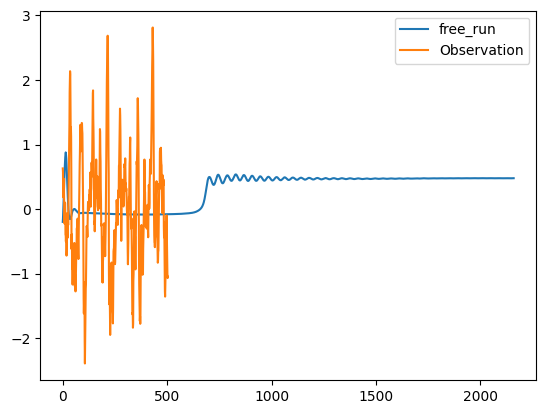

In [13]:
Nino34 = free_run_unit1.loc[:,:,2,-5:5,190:240].mean(dim=['lat','lon'])
# Nino34[:130].plot()
nino34 = Nino34[:,0]
plt.plot(nino34,label='free_run')
plt.plot(data_ori.nino34.values[:720*3],label='Observation')
plt.legend()
plt.savefig("./figure/free_run_nino34.png")

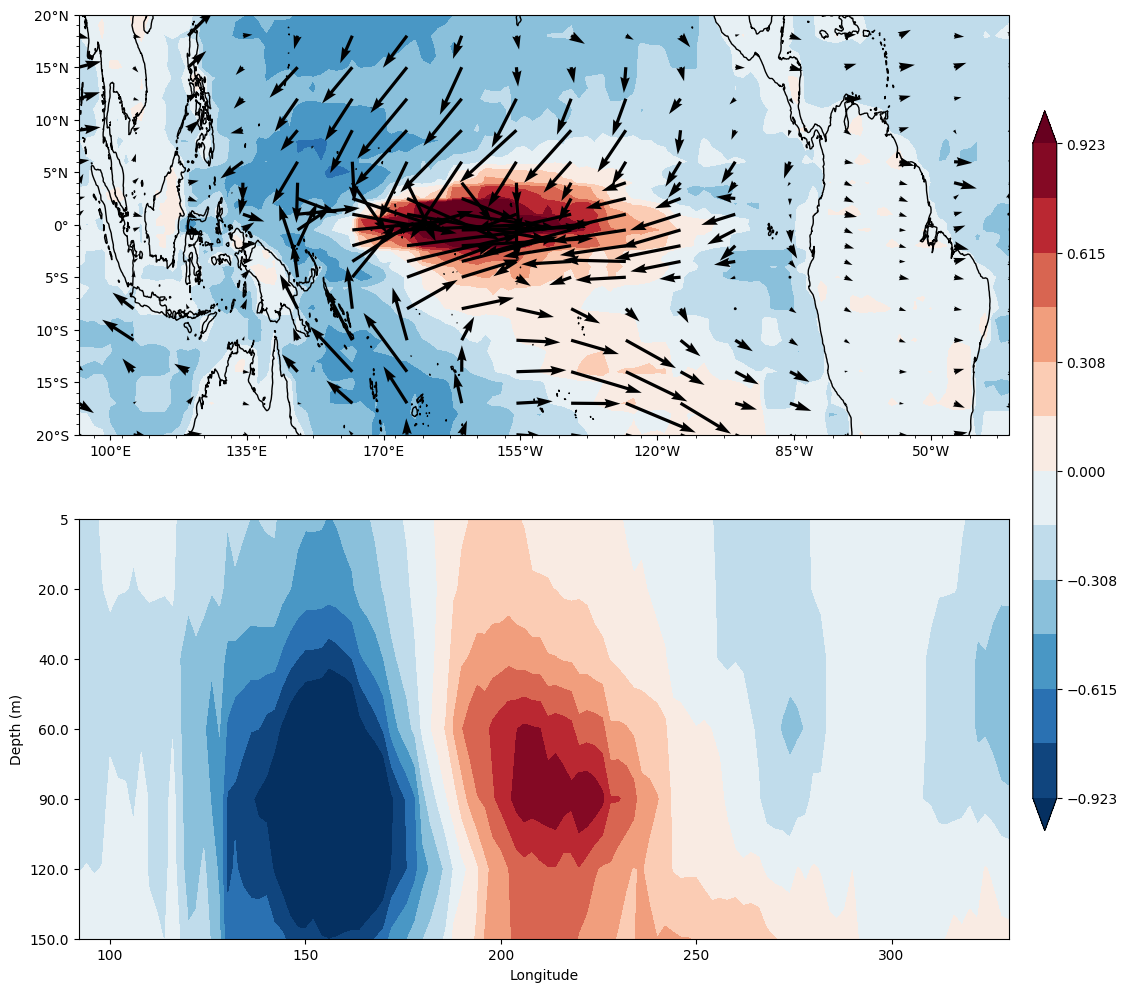

In [21]:
import sacpy.Map
import cartopy.crs as ccrs
sst = free_run_unit1[-1,0,2]
u,v = free_run_unit1[-1,0,0],free_run_unit1[-1,0,1]
lev_temp = free_run_unit1[-1,0,2:].mean(dim='lat')
# lev_temp.plot()
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211,projection=ccrs.PlateCarree(central_longitude=180))
m = ax1.scontourf(sst.lon,sst.lat,sst)
ax1.squiver(u.lon,u.lat,u,v,stepx=7,stepy=3)
ax1.init_map()
# plt.col
ax2 = fig.add_subplot(212)
m = ax2.contourf(sst.lon,lev_temp.lev,lev_temp,levels=m.levels,extend='both')
ax2.invert_yaxis()
ax2.set_yticks(lev_temp.lev.values)
ax2.set_yticklabels([ 5,20.,  40.,  60.,  90., 120., 150.])
ax2.set_ylabel("Depth (m)")
ax2.set_xlabel("Longitude")
ax_bar = fig.add_axes([0.92,0.2,0.02,0.6])
fig.colorbar(m,cax=ax_bar)